---
---
## Trabajo Práctico 2 - Probabilidad Continua
---
---

Considerar 20 variables aleatorias que siguen una distribución normal estándar $(X_1, . . . , X_{20})$ y hacer el cambio de variables $Y_i = X^2_i$. Identificar que función de densidad de probabilidad siguen las nuevas variables $Y_i$. Construir una nueva variable aleatoria $Z=\sum^{20}_{i=1} Y_i$. A continuación simular las 20 variables $X_i$ y calcular el valor $Z$ correspondiente. Repetir este proceso 10.000 veces y hacer un histograma de frecuencias de $Z$. Comparar el histograma con una distribucion chi-cuadrado y otra normal con parametros apropiados.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

In [69]:
# Simulación de las variables normales estándar y cálculo de Z
def simulate(num_simulations, num_variables):
    X = norm.rvs(size=[num_simulations, num_variables])
    Y = X**2
    Z = np.sum(Y, axis=1)
    return Z

In [70]:
Z1 = simulate(10000, 20)
Z2 = simulate(10000, 50)
Z3 = simulate(10000, 100)

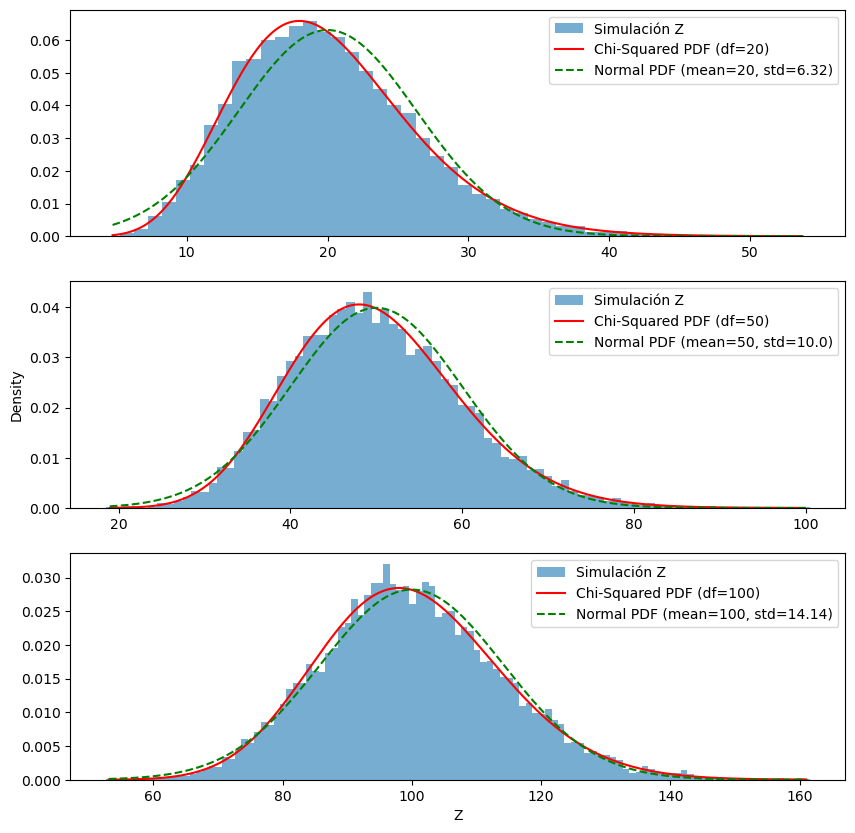

In [74]:
# Crear subfiguras
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

bins = np.arange(min(Z1) - 0.5, max(Z1) + 1.5)
axs[0].hist(Z1, bins=bins, alpha=0.6, linewidth=1.2, density=True, label='Simulación Z')
# Comparar con una distribución chi-cuadrado con 20 grados de libertad
x = np.linspace(min(Z1), max(Z1), 1000)
chi2_pdf = chi2.pdf(x, df=20)
axs[0].plot(x, chi2_pdf, 'r-', label=f'Chi-Squared PDF (df={20})')

# Comparar con una distribución normal con media y varianza apropiadas
mu_Z = 20  # Media de la chi-cuadrado con 20 grados de libertad
sigma_Z = np.sqrt(2 * 20)  # Desviación estándar de la chi-cuadrado con 20 grados de libertad
normal_pdf = norm.pdf(x, loc=mu_Z, scale=sigma_Z)
axs[0].plot(x, normal_pdf, 'g--', label=f'Normal PDF (mean={mu_Z}, std={sigma_Z.round(2)})')
axs[0].legend()


bins = np.arange(min(Z2) - 0.5, max(Z2) + 1.5)
axs[1].hist(Z2, bins=bins, alpha=0.6, linewidth=1.2, density=True, label='Simulación Z')
# Comparar con una distribución chi-cuadrado con 20 grados de libertad
x = np.linspace(min(Z2), max(Z2), 1000)
chi2_pdf = chi2.pdf(x, df=50)
axs[1].plot(x, chi2_pdf, 'r-', label=f'Chi-Squared PDF (df={50})')

# Comparar con una distribución normal con media y varianza apropiadas
mu_Z = 50  # Media de la chi-cuadrado con 20 grados de libertad
sigma_Z = np.sqrt(2 * 50)  # Desviación estándar de la chi-cuadrado con 20 grados de libertad
normal_pdf = norm.pdf(x, loc=mu_Z, scale=sigma_Z)
axs[1].plot(x, normal_pdf, 'g--', label=f'Normal PDF (mean={mu_Z}, std={sigma_Z.round(2)})')
axs[1].legend()
axs[1].set_ylabel('Density')


bins = np.arange(min(Z3) - 0.5, max(Z3) + 1.5)
axs[2].hist(Z3, bins=bins, alpha=0.6, linewidth=1.2, density=True, label='Simulación Z')
# Comparar con una distribución chi-cuadrado con 20 grados de libertad
x = np.linspace(min(Z3), max(Z3), 1000)
chi2_pdf = chi2.pdf(x, df=100)
axs[2].plot(x, chi2_pdf, 'r-', label=f'Chi-Squared PDF (df={100})')

# Comparar con una distribución normal con media y varianza apropiadas
mu_Z = 100  # Media de la chi-cuadrado con 20 grados de libertad
sigma_Z = np.sqrt(2 * 100)  # Desviación estándar de la chi-cuadrado con 20 grados de libertad
normal_pdf = norm.pdf(x, loc=mu_Z, scale=sigma_Z)
axs[2].plot(x, normal_pdf, 'g--', label=f'Normal PDF (mean={mu_Z}, std={sigma_Z.round(2)})')
axs[2].legend()
axs[2].set_xlabel('Z')

plt.show()

Se puede observar que la simulación sigue una distribución $\chi^2$. Además, conforme se aumentan los grados de libertad la PDF y el histograma tienden a una distribución Normal con $\mu = k$ y $\sigma^2 = 2k$, donde $k$ son los grados de libertad.     